In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
kmn = KMeans(n_clusters = 3)
kmn.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

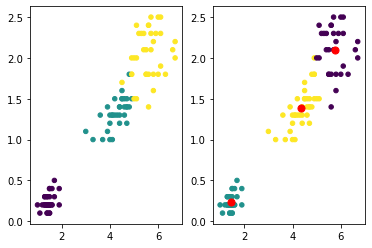

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s = 20)

y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s = 20)

ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s = 50)
plt.show()

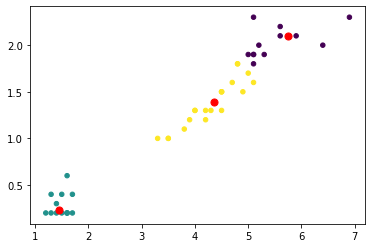

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred = kmn.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, s = 20)
plt.scatter(centra[:, 0], centra[:, 1], c= 'red', s = 50)
plt.show()

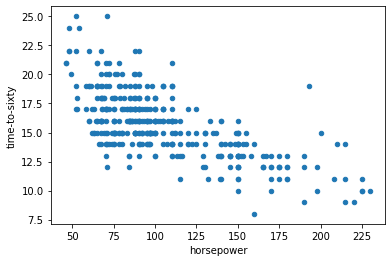

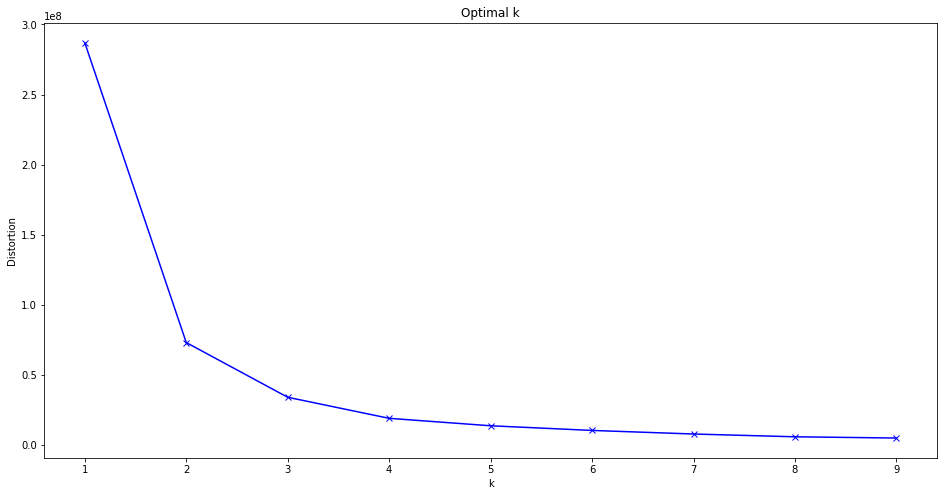

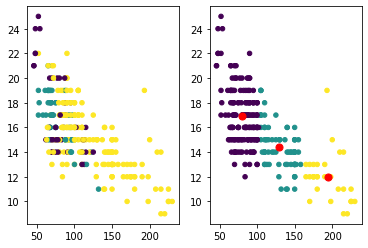

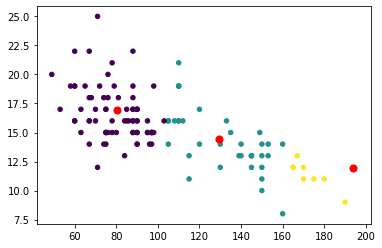

In [90]:
# Zadanie 1

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

cars = fetch_openml('cars1')

# hp, time-to-sixty
X = cars.data[:, [3, 5]]
y = cars.target
y = [int(elem) for elem in y]

df = pd.DataFrame(cars['data'], columns=cars['feature_names'])
df.head()

df.plot(kind='scatter', x='horsepower', y='time-to-sixty')

#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
kmn = KMeans(n_clusters = 3)
kmn.fit(X_train)

centra = kmn.cluster_centers_
fig, ax = plt.subplots(1, 2)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 20)

y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c = y_pred_train, s = 20)

ax[1].scatter(centra[:, 0], centra[:, 1], c = 'red', s = 50)
plt.show()

y_pred = kmn.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, s = 20)
plt.scatter(centra[:, 0], centra[:, 1], c = 'red', s = 50)
plt.show()

In [106]:
# Zadanie 2
print(f'cluster labels no.: {len(set(kmn.labels_))}')

# Po znalezieniu optymalnego k przy pomocy 'elbow method' wyodrebnic mozna 3 klasy, ktore obrazuja kraj pochodzenia (?)

cluster labels no.: 3
